# Big Data (UBA) -  2024

## Trabajo Práctico 1 

### Reglas de formato y presentación
- El trabajo debe estar debidamente documentado comentado (utilizando #) para que tanto los docentes como sus compañeros puedan comprender el código fácilmente.

- El mismo debe ser completado en este Jupyter Notebook y entregado como tal, es decir en un archivo .ipynb


### Fecha de entrega:
Viernes 25 de octubre a las 13:00 hs

### Modalidad de entrega
- Al finalizar el trabajo práctico deben hacer un último <i>commit</i> en su repositorio de GitHub llamado “Entrega final del tp”. 
- Asegurense de haber creado una carpeta llamada TP1. Este Jupyter Notebook y el correspondiente al TP1 deben estar dentro de esa carpeta.
- También deben enviar el link de su repositorio -para que pueda ser clonado y corregido- a mi correo m.n.romero91@gmail.com
- La última versión en el repositorio es la que será evaluada. Por lo que es importante que: 
    - No envien el correo hasta no haber terminado y estar seguros de que han hecho el <i>commit y push</i> a la versión final que quieren entregar. Debido a que se pueden tomar hasta 3 días de extensión a lo largo del curso, no se corregirán sus tareas hasta no recibir el correo.
    - No hagan nuevos <i>push</i> despues de haber entregado su versión final. Esto generaría confusión acerca de que versión es la que quieren que se les corrija. 

### Parte A

#### Ejercicio 1
Usando la API de Mercado Libre, obtener los ítems de una consulta de búsqueda. Pueden buscar cualquier producto de su interés.

In [2]:
# Importamos los módulos necesarios
import requests
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#Configuramos la búsqueda
buscar = "sommier king"
url = "https://api.mercadolibre.com/sites/{}/search?q={}".format("MLA", buscar.replace(" ", "%20"))


# Se hace el get a la API (pedido) y se recibe una respuesta (response)
response = requests.request("GET", url)
print(response) # correcto

ModuleNotFoundError: No module named 'requests'

#### Ejercicio 2
Guarden los precios de los ítems obtenidos en un dataframe y calculen el precio promedio, el mínimo y el máximo. 

In [2]:
# Se convierte la respuesta obtenida en JSON
data = response.json() 
data

# Se extraen los productos que están en el 'results'
productos = data['results']

# Se crea un DataFrame seleccionando sólo algunos elementos de la respuesta
df = pd.DataFrame(productos)[['title', 'condition', 'permalink', 'price', 'original_price']]

# Mostramos las primeras filas del DataFrame
print(df.head())
print(df.head(10))

                                               title condition  \
0  Colchon Espuma Alta Densidad Elite King 2,00 X...       new   
1  Sommier Superior Rest Ultra Plush Super King 2...       new   
2  Colchon Resortes King Size Doble Pillow Top 2 ...       new   
3  Colchon King Size Espuma Alta Densidad 2 X 180...       new   
4  Colchón Y Sommier Espuma Alta Densidad 200x200...       new   

                                           permalink       price  \
0  https://www.mercadolibre.com.ar/colchon-espuma...   344719.00   
1  https://articulo.mercadolibre.com.ar/MLA-14323...  1382854.00   
2  https://articulo.mercadolibre.com.ar/MLA-61952...   481009.00   
3  https://www.mercadolibre.com.ar/colchon-king-s...   399349.00   
4  https://articulo.mercadolibre.com.ar/MLA-91197...   688629.89   

   original_price  
0        491579.0  
1       1382854.0  
2        685929.0  
3        569479.0  
4        983757.0  
                                               title condition  \
0  Colch

In [3]:
# Se calcula el precio promedio, el mínimo y el máximo

# Precio promedio
precio_promedio = df['price'].mean()

# Precio mínimo
precio_minimo = df['price'].min()

# Precio máximo
precio_maximo = df['price'].max()


# Imprimimos los resultados
print(f"Precio promedio: {precio_promedio}")
print(f"Precio mínimo: {precio_minimo}")
print(f"Precio máximo: {precio_maximo}")

Precio promedio: 895750.1403333334
Precio mínimo: 344719.0
Precio máximo: 1915675.0


In [4]:
# Sumamos también el producto con una mayor diferencia entre precio original y precio actual

# En primer lugar creamos la columna necesaria de diferencia_precio 
df['diferencia_precio'] = df['original_price'] - df['price']

# Encontrar el producto con la mayor diferencia
producto_mayor_diferencia = df.loc[df['diferencia_precio'].idxmax()]

# Imprimimos el producto con la mayor diferencia de precio
print(producto_mayor_diferencia)


title                Colchon King Size Espuma Alta Densidad 2 X 2 D...
condition                                                          new
permalink            https://articulo.mercadolibre.com.ar/MLA-61951...
price                                                         522159.0
original_price                                               1167149.0
diferencia_precio                                             644990.0
Name: 5, dtype: object


#### Ejercicio 3
Armen un histograma de los precios. ¿Ven algún <i>outlier<i>? 
Nota: pueden usar la librería de Matplotlib o la de Pandas.

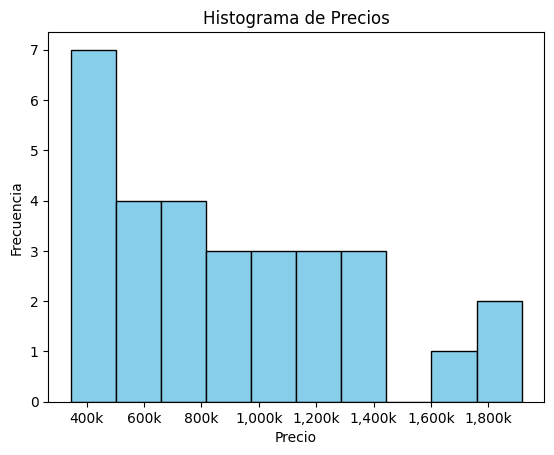

In [15]:
# Creamos un histograma con los precios

# Creamos el histograma con la columna "price"
ax = df['price'].hist(bins=10, edgecolor='black', color='skyblue')

# Personalizamos el eje X para mejorar la visualización 
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x / 1000) + 'k'))
ax.grid(False)

# Se agregan etiquetas y titulos
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')

plt.show()


#### Ejercicio 4
Realicen alguna consulta adicional utilizando la API de Mercado Libre (debe ser alguna consulta que no se haya visto en clase. Por ejemplo, obtener los ítems de un vendedor en particular, obtener los productos de una categoría u otros). Analicen los resultados y comenten uno o dos que les parezcan interesantes (por ejemplo, precios promedio de los productos de un vendedor, diferencia entre el precio original y actual, si acepta mercado pago para la compra de productos, etc.) 

Resultados de búsqueda inicial:
                                               title  seller_id  \
0               Zapatillas Park Street Ig6803 adidas  652366401   
1               Zapatillas Park Street Ig9846 adidas  652366401   
2  Zapatillas adidas Park Street Hombre En Blanco...  306401715   
3  Zapatillas adidas Core Park Street De Hombre 6...  177433927   
4  Zapatillas adidas Park Street Hombre En Blanco...  730168809   
5  Zapatillas adidas Core Park Street De Mujer 66...  177433927   
6  Zapatillas Puma Park Lifestyle Street Unisex 0...  177433927   
7   Zapatillas Puma Moda Park Lifestyle Street Vd Bl  156472100   
8  Zapatillas adidas Core Park Street De Hombre 6...  177433927   
9  Zapatillas Puma Park Lifestyle Street Unisex 0...  177433927   

                  seller_name  
0  ADIDASARGENTINASAADIDASARG  
1  ADIDASARGENTINASAADIDASARG  
2             DEXTER-SHOPS-ML  
3                 GRIDANNEXSA  
4              STOCKCENTER-ML  
5                 GRIDANNEXSA  
6     

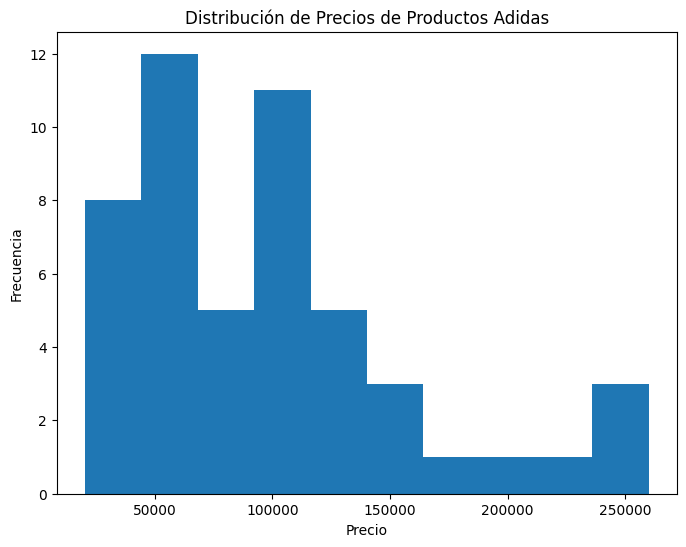

Porcentaje de productos que aceptan MercadoPago:
 accepts_mercadopago
True    100.0
Name: proportion, dtype: float64


In [19]:



# Importación de bibliotecas necesarias
import requests
import pandas as pd
import matplotlib.pyplot as plt

# 1. Configuración de la búsqueda inicial para obtener el seller_id de la tienda oficial de Adidas
buscar = "Zapatillas Park Street Ig6803 adidas"
url_busqueda = f"https://api.mercadolibre.com/sites/MLA/search?q={buscar.replace(' ', '%20')}"

# Solicitud a la API para obtener datos de productos relacionados
response = requests.get(url_busqueda)
data = response.json()

# Extracción de resultados relevantes (productos)
productos = data['results']

# Creación de DataFrame inicial con título, seller_id y nombre del vendedor
df_productos = pd.DataFrame([{
    'title': producto['title'],
    'seller_id': producto['seller']['id'],
    'seller_name': producto['seller'].get('nickname')
} for producto in productos])

# Visualización de los primeros productos y seller_id para identificación de la tienda oficial de Adidas
print("Resultados de búsqueda inicial:")
print(df_productos.head(10))

# 2. Obtención de todos los productos de la tienda oficial de Adidas usando su seller_id
SITE_ID = 'MLA'            # MLA corresponde al sitio de Argentina
SELLER_ID = '652366401'    # Seller_id identificado para la tienda oficial de Adidas

# Endpoint de la API para obtener ítems del vendedor especificado
url_vendedor = f"https://api.mercadolibre.com/sites/{SITE_ID}/search?seller_id={SELLER_ID}"
response_vendedor = requests.get(url_vendedor)
data_vendedor = response_vendedor.json()

# Extracción de productos de la tienda oficial de Adidas
productos_vendedor = data_vendedor['results']

# Creación de DataFrame final con detalles específicos de cada producto
df_vendedor = pd.DataFrame([{
    'title': producto['title'],
    'price': producto['price'],
    'currency_id': producto['currency_id'],
    'accepts_mercadopago': producto.get('accepts_mercadopago', False)
} for producto in productos_vendedor])

# Análisis de los datos recopilados:

# a) Cálculo del precio promedio de los productos
precio_promedio = df_vendedor['price'].mean()
print("Precio promedio de los productos de la tienda oficial de Adidas:", precio_promedio)

# b) Gráfico de la distribución de precios de los productos
plt.figure(figsize=(8, 6))
df_vendedor['price'].plot(kind='hist', title='Distribución de Precios de Productos Adidas')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

# c) Análisis de la aceptación de MercadoPago como método de pago
acepta_mercadopago = df_vendedor['accepts_mercadopago'].value_counts(normalize=True) * 100
print("Porcentaje de productos que aceptan MercadoPago:\n", acepta_mercadopago)

#Conclusión:
# La tienda oficial de Adidas en Mercado Libre tiene un precio promedio de 98,685.01 ARS, con la mayoría de sus productos concentrados 
# en el rango de 50,000 a 100,000 ARS. Aunque ofrece algunos productos premium hasta 250,000 ARS, la oferta en estos rangos más altos es 
# limitada. El 100% de los productos acepta MercadoPago, lo que facilita la financiación. Adidas sigue una estrategia de precios medios a altos, 
# equilibrando accesibilidad y exclusividad en el mercado argentino. 

### Parte B

#### Ejercicio 5
De la página de noticias del [diario La Nación](https://www.lanacion.com.ar/), utilicen herramientas de web scraping para obtener los links de las noticias de la portada. Guarden los links obtenidos en un dataframe y expórtenlo a un archivo de excel.

Nota 1: es posible que logren obtener los links a las noticias sin el dominio: "https://www.lanacion.com.ar/". De ser así, concatenen el dominio a la ruta del link obtenido, tal que se obtenga un link al que se pueda acceder. Es decir, que las cadenas de caracteres finales tendrán la forma: https://www.lanacion.com.ar/*texto_obtenido*)

Nota 2: junto con su entrega, adjunten una captura de la página de noticias al momento de correr su código. Eso servirá al momento de la corrección para verificar que los links obtenidos hacen referencia a las noticias de ese día y hora.

In [1]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd 


In [54]:
url = "https://www.lanacion.com.ar/"

headers = {
   'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

r = requests.get(url, headers=headers) 
contenido = r.content

soup = BeautifulSoup(contenido, "html.parser")

url_links = []
links = soup.find_all('a', class_='link ln-link flex flex-column --unstyled')

for i in links:
    url_completa =f"https://lanacion.com.ar{i.get('href')}"
    url_links.append(url_completa)  

df = pd.DataFrame(url_links, columns=['URL'])
#df.head()

df.to_excel('lanacion.xlsx', index=False)

#df.to_excel('C:/Users/juanp/OneDrive/Escritorio/Econ_Aplicada/Trim3_2024/Big_data/TP_1/lanacion.xlsx', index=False)